<a id='toc'></a>
# Table of Contents
- **[Assignment 1 Description](#Topic0)**
  - [Breast Cancer Wisconsin dataset import](#bcwdi)
  - [Task 0 - Warm-up](#t0)
  - [Task 1 - Data Transformation](#t1)
  - [Task 2 - Class Distribution](#t2)
  - [Task 3 - Data Preparation](#t3)
  - [Task 4 - Train-Test Split](#t4)
  - [Task 5 - KNN Classifier Construction](#t5)
  - [Task 6 - KNN Prediction on Mean Vector](#t6)
  - [Task 7 - KNN Prediction on the Test Set](#t7)
  - [Task 8 - Evaluation on the Test Set](#t8)
    - [Accuracy plot code](#apc)
    - [Accuracy plot \#1](#accplot1)
  - [Task 9 - Model Hyper-parameters](#t9)
    - [Accuracy plot \#2](#accplot2)  
  - [Task 10 - Weighted KNN](#t10)
  - [Task 11 - Model Hyper-parameter Tuning](#t11)
  - [Task 12 - Overfitting](#t12)
  - [Task 13 - One-Hot Encoding](#t13)

In [4]:
# Either of the following is no longer
# necessary for matplotlib in notebooks.
# The import statement has you covered!

# %matplotlib notebook
# %matplotlib inline

<a id='Topic0'></a>
# Assignment 1: Introduction to Supervised Machine Learning (KNN Classifier)

In this Assignment, I will be using the Breast Cancer Wisconsin (Diagnostic) dataset to develop a classifier that aids in the diagnosis of patients. This dataset is particularly interesting as it serves as a solid basis for a k-Nearest Neighbors (kNN) classification problem and is also one of the built-in datasets available in scikit-learn. My objective is to leverage machine learning to contribute to medical diagnostics, especially in the context of early detection and diagnosis of breast cancer. By implementing the kNN algorithm, I aim to build a model capable of distinguishing between benign and malignant tumors based on various attributes obtained from a digitized image of a fine needle aspirate (FNA) of a breast mass.

<a href='#toc'>TOC</a>

In [5]:
# Suppress all warnings only when absolutely necessary
# Warnings are in place for a reason!
import warnings

# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')

In [48]:
from functools import lru_cache

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns

up, down = True, False

In [7]:
np.set_printoptions(precision=3)

## Additional imports can be inlcuded here

<a id='bcwdi'></a>
### [Breast Cancer Wisconsin](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) dataset import.

Note that the object returned by `load_breast_cancer()` is a scikit-learn [Bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html) object which is similar to a Python dictionary.  

To view the `bunch` attributes, use the `.keys()` method of the cancer object. Feel free to explore this object yourself. 

<a href='#toc'>TOC</a>

In [8]:
# Load the dataset from scikit-learn.

cancer = load_breast_cancer()

In [49]:
# To see a description of the dataset, bunch object from scikit-learn.

print(cancer.keys(), "\n")
# print(cancer.DESCR)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 



<a id='t0'></a>
### Task 0 .

Review how many features are there in this dataset.

<a href='#toc'>TOC</a> 

In [50]:
def feature_count(cancer):
    result = None

    # YOUR CODE HERE
    #raise NotImplementedError()
    result = len(cancer['feature_names'])
    return result

feature_count(cancer)

30

<a id='t1'></a>
### Task 1 - Data Transformation.

Transform the bunch object into more hunman friendly tabular data format, pandas.DataFrame. Use this existing columns:

['mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension',
'target']


In [14]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
def make_cancer_dataframe():
    cancer_df = None

    # Create DataFrame where the rows are data entries and column names are feature_names from the sklearn Bunch object
    cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
    
    # Add the target column
    cancer_df['target'] = cancer.target
    return cancer_df

In [51]:
make_cancer_dataframe().head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<a id='t2'></a>
### Task 2 - Class Distribution .

Get the descriptive statistics, such as mean and variance of certain features, on the data at hand to understand the big picture. 

Find out what is the class distribution? That is, how many instances belong to the *malignant* class (encoded as 0) and the *benign* class (encoded as 1), respectively? The function below will return the class distribution as a pandas.Series of length 2 whose index is  `['malignant', 'benign']`  

<a href='#toc'>TOC</a>

In [52]:
def get_target_distro():
    distro = None
    # Create Df
    df = make_cancer_dataframe()
    
    # Map the categorical value to corresponding class strings
    target_map = {0: 'malignant', 1: 'benign'}
    df['target'] = df['target'].map(target_map)
    
    # Count the number for each class
    distro = df['target'].value_counts()
    return distro

get_target_distro()

benign       357
malignant    212
Name: target, dtype: int64

<a id='t3'></a>
### Task 3 - Data Preparation 

Training a classifier is a *supervised* machine learning problem, in which each instance $x_i$ has a corresponding class label $y_i$. All the instances $x_i$'s are collected into a matrix $X$ (with one instance per row of $X$), and all the corresponding labels are put into a column vector $y$. 

The function below to use scikit learn to split our DataFrame into `X` (the data) and `y` (the labels), and to return them as a `tuple`, where
* `X` is a `pd.DataFrame` of the shape `(569, 30)`
* `y` is a `pd.Series` of the shape `(569,)`.  



In [53]:
def prepare_X_y():
    X, y = None, None

    # YOUR CODE HERE
    #raise NotImplementedError()
    # Create df
    df = make_cancer_dataframe()
    
    # Create X pd.DataFrame
    X = df.drop('target', axis=1)
    
    # assign our label,'target' column to y
    y = df['target']
    return X, y

prepare_X_y()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

<a id='t4'></a>
### Task 4 - Train-Test Split (10 points).

For a typical machine learning problem, we'd need two separate datasets, one for training a model and the other for evaluating the trained model for its generalisability to unseen data. 

The `train_test_split` function below would use `scikit-learn` to split `X` and `y` into training and testing sets. The functions accepts three arguments, X, y, and random_state. X may be a (m by n) pandas DataFrame or numpy array. y may be an pandas Series or an (m, ) numpy array. The third argument is an integer used by the random_state parameter.  

The function would return a `tuple` `(X_train, X_test, y_train, and y_test)` where, for the breast cancer dataset, 
* `X_train` is of the shape `(426, 30)`
* `X_test` is of the shape `(143, 30)`
* `y_train` is of the shape `(426,)`
* `y_test` is of the shape `(143,)`

In [70]:
from sklearn.model_selection import train_test_split


def get_train_test(
    X: (pd.DataFrame or np.ndarray), y: (pd.Series or np.ndarray), random_state: int
) -> tuple:
    X_train, X_test, y_train, y_test = (None,) * 4

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    return X_train, X_test, y_train, y_test

random_state = 42

X_train, X_test, y_train, y_test = get_train_test(*prepare_X_y(), random_state)

<a id='t5'></a>
### Task 5 - kNN Classifier Construction 

Use [KNeighborsClassifier](https://scikit-learn.org/1.2/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) from `scikit-learn` to fit a $k$-Nearest Neighbours ($k$NN) classifier with `X_train` and `y_train` where `k=1`. 

<a href='#toc'>TOC</a>

In [71]:
from sklearn.neighbors import KNeighborsClassifier


def k_nearest_neighbors(random_state, k=1):
    knn = None

    # YOUR CODE HERE
    #raise NotImplementedError()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

k_nearest_neighbors(42)

KNeighborsClassifier(n_neighbors=1)

<a id='t6'></a>
### Task 6 - KNN Prediction on Mean Vector 

It's often useful and interesting to know what class a "typical" or "average" data point belongs to. Use your kNN classifier from the last task to predict the class label for the *mean vector* of the training data. Your function should return the predicted class label as a singleton numpy array --- either `array([ 0.])` or `array([ 1.])`. 

If you encounter errors complaining that the shape of your data isn't correct, carefully check the [KNN documentation](https://scikit-learn.org/1.2/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) of the `predict` function. Another useful hint is to consider what kind of object `X_train` is. How do you make sure it is in the correct shape?  

<a href='#toc'>TOC</a>

In [35]:
# hidden autograder codeblock
task_id = "6"

In [78]:
X_train.mean().values.reshape(1,-1)

array([[1.412e+01, 1.920e+01, 9.189e+01, 6.549e+02, 9.556e-02, 1.025e-01,
        8.747e-02, 4.774e-02, 1.800e-01, 6.261e-02, 4.021e-01, 1.208e+00,
        2.864e+00, 4.013e+01, 7.036e-03, 2.537e-02, 3.228e-02, 1.185e-02,
        2.049e-02, 3.783e-03, 1.621e+01, 2.551e+01, 1.069e+02, 8.737e+02,
        1.312e-01, 2.477e-01, 2.677e-01, 1.127e-01, 2.878e-01, 8.335e-02]])

In [79]:
X_train.mean().to_frame().T

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.122664,19.19885,91.885023,654.919484,0.095556,0.102507,0.08747,0.047744,0.180024,0.062607,...,16.211859,25.506878,106.886784,873.720657,0.131202,0.247729,0.267698,0.112653,0.287797,0.083346


In [80]:
def knn_predict_on_mean(random_state):
    pred = None

    # Get X_train mean numbers and convert it from series back to dataframe (knn classifier only takes in 2D tabular data)
    mean_vec = X_train.mean().to_frame().T
    
    # Generate Knn object
    knn = k_nearest_neighbors(random_state)
    
    # Predict mean vector
    pred = knn.predict(mean_vec)
    return pred

knn_predict_on_mean(42)

<a id='t7'></a>
### Task 7 - KNN Prediction on the Test Set 

Use the KNN classifier to predict class labels for the test set `X_test`. Will be a binary result

In [85]:
def knn_predict_on_test(random_state):
    preds = None

    # YOUR CODE HERE
    #raise NotImplementedError()
    # Generate Knn 
    knn = k_nearest_neighbors(random_state)
    
    # Predict X_test
    preds = knn.predict(X_test)
    return preds

knn_predict_on_test(42)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

<a id='t8'></a>
### Task 8. Evaluation on the Test Set
I want to compare the predictions with the ground-truth labels to gauge how well the model performs when given unseen data. 

The function below computes the simple evaluation score (mean accuracy) of the KNN classifier using the test set `X_test` and the test labels `y_test`. 



In [87]:
def knn_score_prediction(random_state):
    score = None
    # Generate Knn
    knn = k_nearest_neighbors(random_state)
    
    # Use score method to get the accuracy of the Knn
    score = knn.score(X_test, y_test)
    return score

knn_score_prediction(random_state=42)

<a id='accplot1'></a>
### Accuracy plot #1 

Note: The following plots will evaluate the model with showing the prediction accuracy in training and testing set.  Can pass in any trained classifier as the argument.  

Visualize the different predicition scores between training and test sets, as well as malignant and benign cells.

<a href='#toc'>TOC</a>

In [89]:
def accuracy_plot(knn, random_state):
    X_train, X_test, y_train, y_test = get_train_test(*prepare_X_y(), random_state)

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train == 0]
    mal_train_y = y_train[y_train == 0]
    ben_train_X = X_train[y_train == 1]
    ben_train_y = y_train[y_train == 1]

    mal_test_X = X_test[y_test == 0]
    mal_test_y = y_test[y_test == 0]
    ben_test_X = X_test[y_test == 1]
    ben_test_y = y_test[y_test == 1]

    scores = [
        knn.score(mal_train_X, mal_train_y),
        knn.score(ben_train_X, ben_train_y),
        knn.score(mal_test_X, mal_test_y),
        knn.score(ben_test_X, ben_test_y),
    ]

    plt.figure(figsize=(8, 6))

    # Plot the scores as a bar chart
    bars = plt.bar(
        np.arange(4), scores, color=["#4c72b0", "#4c72b0", "#55a868", "#55a868"]
    )

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(
            bar.get_x() + bar.get_width() / 2,
            height * 0.90,
            "{0:.{1}f}".format(height, 2),
            ha="center",
            color="w",
            fontsize=11,
        )

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(
        top="off",
        bottom="off",
        left="off",
        right="off",
        labelleft="off",
        labelbottom="on",
    )

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks(
        [0, 1, 2, 3],
        ["Malignant\nTraining", "Benign\nTraining", "Malignant\nTest", "Benign\nTest"],
        alpha=0.8,
    )

    plt.title("Training and Test Accuracies for Malignant and Benign Cells", alpha=0.8)

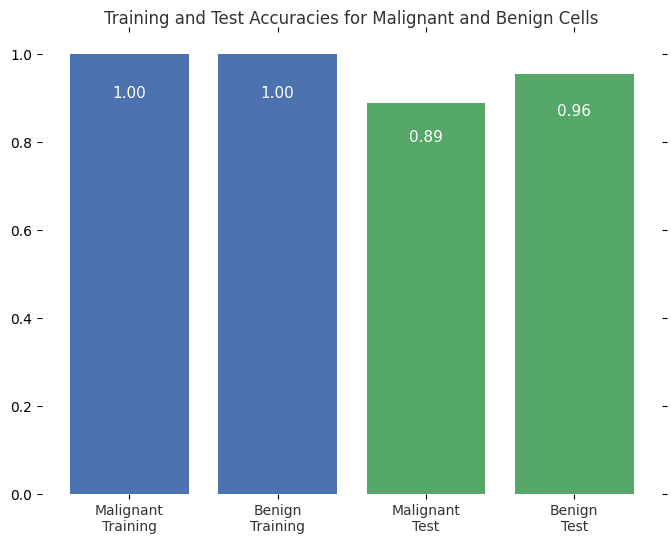

In [90]:
accuracy_plot(k_nearest_neighbors(random_state=42), random_state=42)

<a id='t9'></a>
### Task 9 - Model Hyper-parameters 

Experiment with different configurations of a model with "hyper-parameters" which are typically specified in advance of starting the step of estimating the learnable "parameters" of a specific model configuration in order to achieve better performance. The critical hyper-parameter of a KNN model is $k$, the number of neighbors to examine. 

Change $k$ to 15 and fit the model with training data.  Compare this with the results above for $k$ = 1.  

<a href='#toc'>TOC</a>

In [92]:
def knn_hyperparameter_change(random_state):
    knn = None

    # YOUR CODE HERE
    #raise NotImplementedError()
    knn = k_nearest_neighbors(random_state, k=15)
    return knn

knn_hyperparameter_change(random_state=42)

KNeighborsClassifier(n_neighbors=15)

<a id='accplot2'></a>
### Accuracy plot #2 


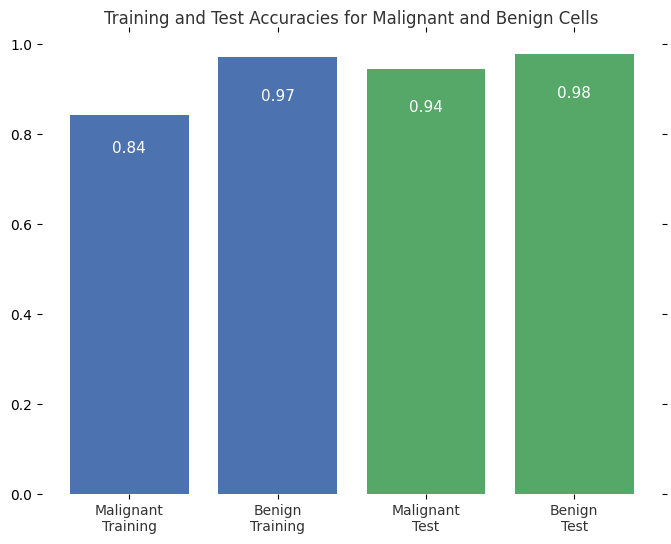

In [94]:
accuracy_plot(knn_hyperparameter_change(42), random_state=42)

<a id='t10'></a>
### Task 10 - Weighted KNN 

Keeping $k = 15$, now change the KNN method to use a *weighted* distance measure, making closer neighbors of a query point will have more influence on the prediction than neighbors which are a greater distance away. (Normally, the default KNN classifier ignores how far a neighbor is and just sees that it exists.)



In [118]:
def knn_weighted_distance(random_state, n_neighbors=15):
    knn = None

    # YOUR CODE HERE
    #raise NotImplementedError()
    # Change the weights to 'distance'
    knn = KNeighborsClassifier(n_neighbors=13, weights='distance')
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    return knn


knn_weighted_distance(42)

KNeighborsClassifier(n_neighbors=13, weights='distance')

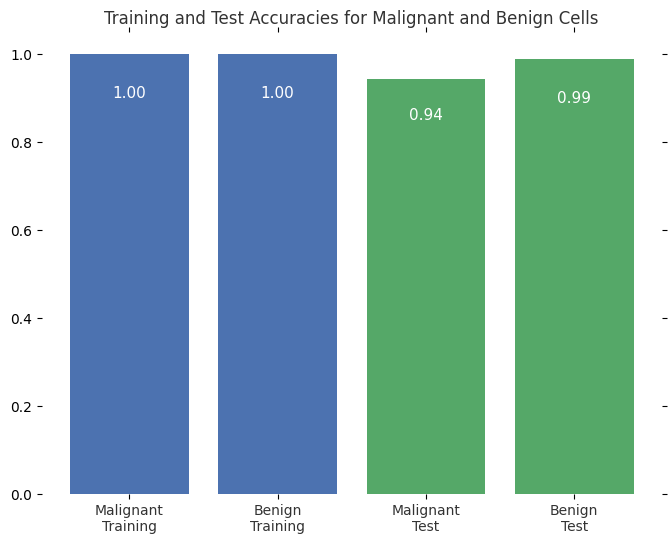

In [119]:
accuracy_plot(knn_weighted_distance(42), random_state=42)

<a id='t11'></a>
### Task 11: Model Hyper-parameter Tuning 

Improve algorithm design through automatically changing the parameter based on data-driven evidence. It is more effective than just 'trying out' different parameters by hand.

Perform a simple parameter sweep for all **odd** values of $k$ from 1 to 19 inclusive (a simple loops works well here), and return the optimal value of $k$ that leads to the highest overall *test set accuracy* on this train/test split.  Accuracy is computed using the **score** method.


In [117]:
def knn_hyperparameter_tuning(random_state):
    k_best = None

    # YOUR CODE HERE
    #raise NotImplementedError()
    # Create a loop to compare and find the best k value that yields the best score
    k_best = 1
    best_score = 0
    
    for k in range(1, 20, 2):
        knn = knn_weighted_distance(42, n_neighbors=k)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        if score > best_score:
            k_best = k
            best_score = score
            
    return k_best

knn_hyperparameter_tuning(42)

13

<a id='t12'></a>
### Task 12: Overfitting 

Overfitting is obtaining a training set accuracy that is extremely high (or even perfect), but a test set accuracy that is considerably lower. It is tempting to use a classifier that does so well on the training data it was given, but reality sets in when we try to use this overfit classifier on new test data and we discover it does not in fact generalize well.

The knn_overfitting function is designed to illustrate the concept of overfitting in the context of the k-Nearest Neighbors (kNN) classifier by finding the value of k (number of neighbors) that maximizes performance on the training set, and then reporting how this choice of k performs on both the training and test sets. The function aims to identify a scenario where overfitting is likely, as indicated by high training accuracy possibly accompanied by lower test accuracy. 

Result:

`tuple[0]`: the optimal value of $k$ that maximizes *training set* accuracy

`tuple[1]`: the corresponding *training set* accuracy for that optimal $k$

`tuple[2]`: the corresponding *test set* accuracy that you would have received *if* you had used that optimal $k$.


In [122]:
def knn_overfitting(random_state):
    k_best = None

    # YOUR CODE HERE
    #raise NotImplementedError()
    k_best = 1
    best_train_score = 0
    best_test_score = 0
    
    for k in range(1, 20, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test, y_test)
        
        if train_score > best_train_score:
            k_best = k
            best_train_score = train_score
            best_test_score = test_score
    return k_best, best_train_score, best_test_score

knn_overfitting(42)

(1, 1.0, 0.9300699300699301)

<a id='t13'></a>
## Task 13 - One-Hot Encoding (10 points).

The task is to practice One-Hot Encoding and understand its logic behind.

One-Hot Encoding is a method of transforming numeric or non-numeric categorical data into columns of binary representations; one column for each unique category within a specified column. The core reason for this transformation is that most machine learning methods must ulitimately operate on numeric data. By transforming categorical data into binary representations, the numeric requirement is met and the model will be able to utilize these specific features. Note that some instances of categorical data are numeric, e.g. nominal representations. These data must also be transformed to ensure that the arbitrary assignment of numeric values do not incorrectly bias the output of the model.  

This task will incorporate the SciKit-Learn module [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/1.2/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)


## Our dataset: OpenML house_prices
For this task were are going to use a slightly mangled subset of the OpenML house_prices dataset. The purpose of the dataset is purely for developing an intuition of the One-Hot Encoding process!

In [123]:
def get_house_prices_data() -> tuple:
    data = pd.read_csv("./assets/housing_prices.csv")

    X = data.drop("SalePrice", axis=1)
    y = data["SalePrice"]

    X["Electrical"].fillna("Mix", inplace=True)

    features = [
        "BldgType",  #
        "LotArea",
        "YearBuilt",
        "HouseStyle",  #
        "GrLivArea",
        "Electrical",  #
        "GarageArea",
        "OpenPorchSF",
        "YrSold",
    ]

    return X[features], y


def get_house_prices_split(random_state: int = 42):
    X, y = get_house_prices_data()

    X_train, X_test, y_train, y_test = get_train_test(X, y, random_state)

    X_train.replace(to_replace=["2fmCon"], value=["Twnhs"], inplace=True)
    X_train.replace(to_replace=["2.5Unf"], value=["2.5Fin"], inplace=True)
    X_train.replace(to_replace=["FuseF"], value=["FuseA"], inplace=True)

    return X_train, X_test, y_train, y_test

### Examine housing data here

In [126]:
X_train, X_test, y_train, y_test = get_house_prices_split()

display(X_train)
display(X_train["BldgType"].value_counts())
display(X_test["BldgType"].value_counts())

,BldgType,LotArea,YearBuilt,HouseStyle,GrLivArea,Electrical,GarageArea,OpenPorchSF,YrSold
1023,TwnhsE,3182.0,2005.0,1Story,1504.0,SBrkr,437.0,20.0,2008.0
810,1Fam,10140.0,1974.0,1Story,1309.0,SBrkr,484.0,0.0,2006.0
1384,1Fam,9060.0,1939.0,1.5Fin,1258.0,SBrkr,280.0,0.0,2009.0
626,1Fam,12342.0,1960.0,1Story,1422.0,SBrkr,286.0,0.0,2007.0
813,1Fam,9750.0,1958.0,1Story,1442.0,SBrkr,301.0,0.0,2007.0
...,...,...,...,...,...,...,...,...,...
1095,1Fam,9317.0,2006.0,1Story,1314.0,SBrkr,440.0,22.0,2007.0
1130,1Fam,7804.0,1928.0,1.5Fin,1981.0,SBrkr,576.0,44.0,2009.0
1294,1Fam,8172.0,1955.0,1Story,864.0,SBrkr,572.0,0.0,2006.0
860,1Fam,7642.0,1918.0,1.5Fin,1426.0,SBrkr,216.0,240.0,2007.0


1Fam      915
TwnhsE     84
Twnhs      59
Duplex     37
Name: BldgType, dtype: int64

1Fam      305
TwnhsE     30
Duplex     15
Twnhs      11
2fmCon      4
Name: BldgType, dtype: int64

<a id='t13_proc'></a>

### Task 13 Procedure
The one_hot_encoding function is defined with two parameters as follows:<br>
`oh_features`: a list of one or more strings indicating the feature column(s) to be OHE'd.<br>
`handle_unk`: a string value to set the OneHotEncoder 'handle_unknown' paramter argument.<br>

The function would return a tuple of five objects, the four usual train/test split pandas objects and a Python list of strings corresponding to the new One-Hot Encoded feature names. See the definitions provided in the one_hot_encoding() function below.<br>

The function calls `get_house_prices_split()` to obtain the initial dataset. Note that this function does accept an argument for random_state which defaults to a value of `42`.<br>

It will be necessary to set the following parameters in the construction of the OneHotEncoder() object:<br>
`handle_unknown=handle_unk,`  
`sparse_output=False,`  
`dtype=int,`  

Note that the previoius `sparse` parameter is deprecated in SciKit-Learn version 1.2 and above and has transitioned to `sparse_output`.  

When retrieving feature OHE feature names, I use the method .get_feature_names_out() as this is the current standard for SciKit-Learn  

For the returned train/test datasets to be useful, I will combine the newly One-Hot Encoded features with the X_train and X_test splits obtained from get_house_prices_split(). 

[sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/1.2/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [127]:
def one_hot_encoding(encode_features: [str], handle_unk: str = "error") -> pd.DataFrame:
    """One-Hot Encoding function which gets train/test split data from the provided function.

    Args:
        param1 [str]: positional, list of strings representing features to encode
        param2 str: positional with default, OneHotEncoder() 'handle_unknown' argument

    Returns:
        tuple (pd.DataFrame, pd.DataFrame, pd.Series, pd.Series, [str]): train/test split objects
        and a list of One-Hot Encoded Feature names as strings.
    """
    X_train: pd.DataFrame = None
    X_test: pd.Series = None
    y_train: pd.DataFrame = None
    y_test: pd.Series = None
    ohe_features: [str] = None

    X_train, X_test, y_train, y_test = get_house_prices_split()
    
    # Initiate one hot encoder
    ohe = OneHotEncoder(handle_unknown=handle_unk, sparse_output=False, dtype=int)
    ohe.fit(X_train[encode_features])
    
    # Generate ohe Pandas DataFrame
    ohe_X_train = pd.DataFrame(
        ohe.transform(X_train[encode_features]), 
        columns=ohe.get_feature_names_out(encode_features), 
        index=X_train.index
    )
    
    ohe_X_test = pd.DataFrame(
        ohe.transform(X_test[encode_features]),
        columns=ohe.get_feature_names_out(encode_features),
        index=X_test.index
    )
    
    # Concate ohe dummy columns to original pd df
    X_train = pd.concat([X_train, ohe_X_train], axis=1)
    X_test = pd.concat([X_test, ohe_X_test], axis=1)
    
    ohe_features = list(ohe.get_feature_names_out(encode_features))
    
    return X_train, X_test, y_train, y_test, ohe_features

<a id='t13_ec'></a>
#### Task 13 Exploration cell
<a href='#t13_proc'>Task 13 Procedure</a>

In [ ]:
# add/remove comment hashes to enable/disable multiple One-Hot encodings
encode_features = [
    "BldgType",
    # "HouseStyle",
    # "Electrical",
]

# index a single handling method in your function call
handle_unk = [
    "error",
    "ignore",
    "infrequent_if_exist",
]

handle_idx = 1

X_tr, X_te, y_tr, y_te, ohe_feat = one_hot_encoding(
    encode_features, handle_unk[handle_idx]
)

display(ohe_feat)
display(X_tr)
display(X_te)

# del X_tr, X_te, y_tr, y_te, ohe_feat

['BldgType_1Fam', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE']

,BldgType,LotArea,YearBuilt,HouseStyle,GrLivArea,Electrical,GarageArea,OpenPorchSF,YrSold,BldgType_1Fam,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
1023,TwnhsE,3182.0,2005.0,1Story,1504.0,SBrkr,437.0,20.0,2008.0,0,0,0,1
810,1Fam,10140.0,1974.0,1Story,1309.0,SBrkr,484.0,0.0,2006.0,1,0,0,0
1384,1Fam,9060.0,1939.0,1.5Fin,1258.0,SBrkr,280.0,0.0,2009.0,1,0,0,0
626,1Fam,12342.0,1960.0,1Story,1422.0,SBrkr,286.0,0.0,2007.0,1,0,0,0
813,1Fam,9750.0,1958.0,1Story,1442.0,SBrkr,301.0,0.0,2007.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1Fam,9317.0,2006.0,1Story,1314.0,SBrkr,440.0,22.0,2007.0,1,0,0,0
1130,1Fam,7804.0,1928.0,1.5Fin,1981.0,SBrkr,576.0,44.0,2009.0,1,0,0,0
1294,1Fam,8172.0,1955.0,1Story,864.0,SBrkr,572.0,0.0,2006.0,1,0,0,0
860,1Fam,7642.0,1918.0,1.5Fin,1426.0,SBrkr,216.0,240.0,2007.0,1,0,0,0


,BldgType,LotArea,YearBuilt,HouseStyle,GrLivArea,Electrical,GarageArea,OpenPorchSF,YrSold,BldgType_1Fam,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
892,1Fam,8414.0,1963.0,1Story,1068.0,SBrkr,264.0,0.0,2006.0,1,0,0,0
1105,1Fam,12256.0,1994.0,2Story,2622.0,SBrkr,712.0,32.0,2010.0,1,0,0,0
413,1Fam,8960.0,1927.0,1Story,1028.0,FuseA,360.0,0.0,2010.0,1,0,0,0
522,1Fam,5000.0,1947.0,1.5Fin,1664.0,SBrkr,420.0,24.0,2006.0,1,0,0,0
1036,1Fam,12898.0,2007.0,1Story,1620.0,SBrkr,912.0,0.0,2009.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,1Fam,12046.0,1976.0,2Story,2030.0,SBrkr,551.0,224.0,2007.0,1,0,0,0
243,TwnhsE,10762.0,1980.0,2Story,1217.0,SBrkr,288.0,28.0,2009.0,0,0,0,1
1342,1Fam,9375.0,2002.0,2Story,2169.0,SBrkr,647.0,87.0,2007.0,1,0,0,0
1057,1Fam,29959.0,1994.0,2Story,1850.0,SBrkr,467.0,98.0,2009.0,1,0,0,0


In [ ]:
# Autograder tests
print(f"Task {task_id} - AG tests")

try:
    test = one_hot_encoding(["BldgType"], "error")
except:
    print("'handle_unknown=error' failed as expected.")
else:
    assert isinstance(
        test[0], int
    ), f"Task {task_id}: Your function may have an incorrect implementation of 'handle_unknown.'"

stu_ans = one_hot_encoding(["BldgType"], "ignore")

print(f"Task {task_id} - your X_train shape: {stu_ans[0].shape}")
print(f"Task {task_id} - your X_test shape: {stu_ans[1].shape}")

for i in range(4):
    assert isinstance(
        stu_ans[1], (pd.DataFrame, pd.Series)
    ), f"Task {task_id}: The object returned by your function is not of the correct type."

# Some hidden tests

del stu_ans

Task 13 - AG tests
'handle_unknown=error' failed as expected.
Task 13 - your X_train shape: (1095, 13)
Task 13 - your X_test shape: (365, 13)



<a href='#toc'>TOC</a>